In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import seaborn as sns
import warnings

import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import itertools, scipy
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
# import skbio

# import cell2cell as c2c


warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [3]:
df_train = 'train.csv'
df_test = 'test.csv'
df_train=pd.read_csv(df_train)
df_test=pd.read_csv(df_test)


In [4]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [5]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


### level jabatan dan masa kerja pada level jabatan

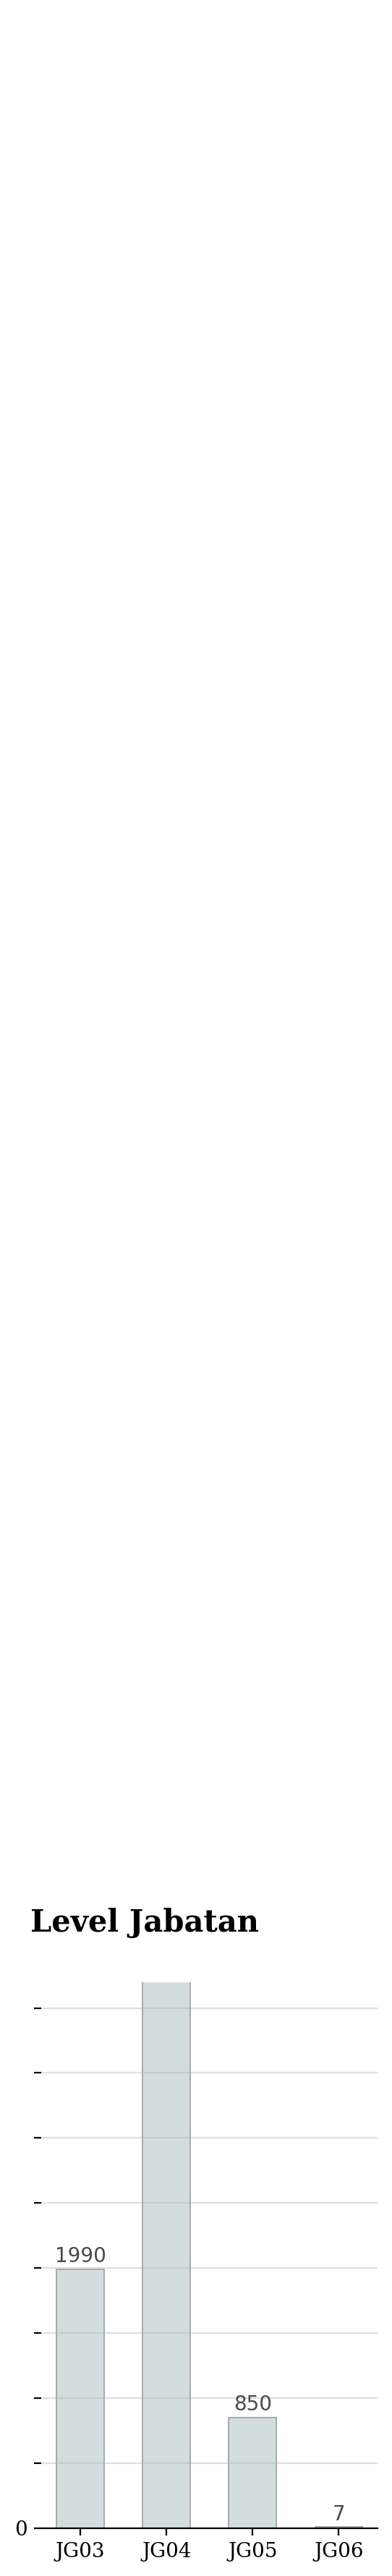

In [8]:
fig, ax=plt.subplots(1,1, figsize=(3,5))
data_jl=df_train['job_level'].value_counts().sort_index()
ax.bar(data_jl.index, data_jl, width=0.55,
       edgecolor='darkgray', color='#d4dddd',
       linewidth=0.7
      )
for i in data_jl.index:
    ax.annotate(f"{data_jl[i]}",
               xy=(i, data_jl[i] + 100),
                va='center', ha='center',
                color='#4a4a4a'
               )
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)    
ax.set_xticklabels(data_jl.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 50, 50),fontfamily='serif')
fig.text(0.1, 0.95, 'Level Jabatan', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

### gender  & age distribusi

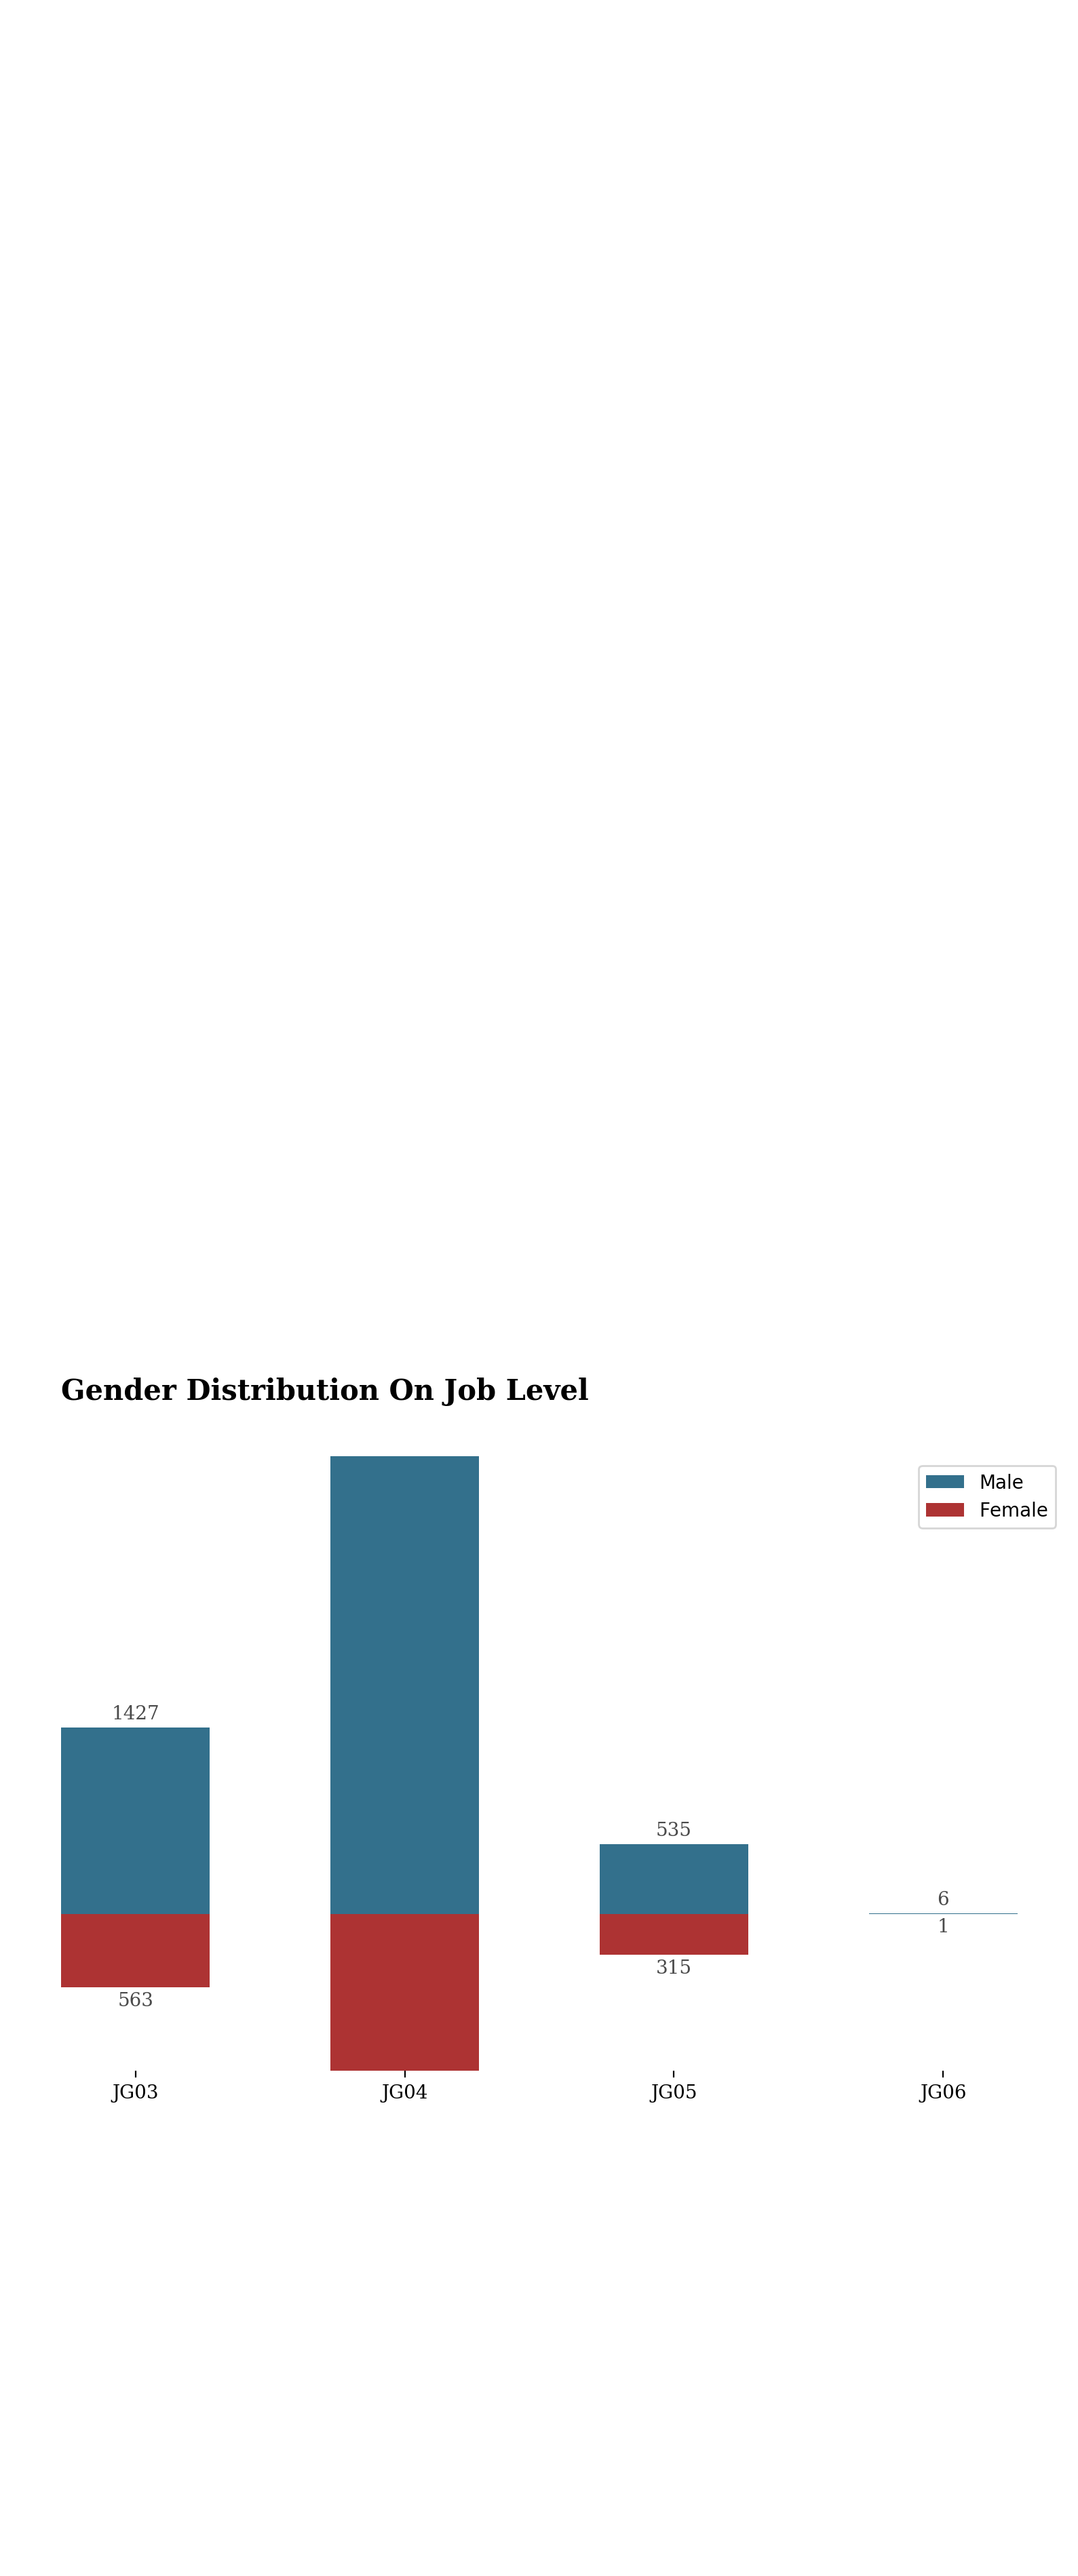

In [10]:
df_train['gender']=df_train['gender'].apply(lambda x :'ETC' if x not in['Male','Female'] else x)
data_ka= df_train[df_train['gender'] != 'ETC'].groupby(['gender'])['job_level'].value_counts().unstack().sort_index()
man = data_ka.loc['Male']
woman = -data_ka.loc['Female']

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)


for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_ka.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Gender Distribution On Job Level', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

In [16]:
df_train.gender.value_counts()

Male      16335
Female     5670
Name: gender, dtype: int64